In [1]:
import numpy as np
import pandas as pd
from deepneuralnet import *
import deepneuralnet_train as dnntrain

In [2]:
# Set up hyper parameters 
classes = 10
layer_dims = [10, classes] 
learning_rate = 0.001
keep_prob = 1.0
num_epochs = 100
minibatch_size = 64
print_summary = False
isBinary = classes == 2 
hyperparams = DNN.create_hyperparameter_bundle(layer_dims, learning_rate, num_epochs, keep_prob, minibatch_size)
print(hyperparams)

{'layer_dims': [10, 10], 'keep_prob': 1.0, 'learning_rate': 0.001, 'num_epochs': 100, 'minibatch_size': 64}


In [3]:
# Generate data
m = 1000
n_x = 100
label = 'Survived'
x_data = np.random.rand(m, n_x)
y_test = None

if isBinary:
    y_test = np.random.randint(2, size=(1, m))[0]
else:
    y_test = np.random.randint(classes, size=(1, m))[0]

df = pd.DataFrame(x_data)
df[label] = y_test
df = df.astype('float32')
classification = len(set(y_test))
print(classification)

10


train_x.shape: (700, 100)
train_y.shape: (700, 10)
dev_x.shape: (300, 100)
dev_y.shape: (300, 10)
10-class classification neural network with hyperparameters:
layer_dims: [10, 10] dropoutKeepProb: 1.0 learning_rate: 0.001 num_epochs: 100 minibatch_size: 64
Training underway...
Cost after epoch 0: 2.597339
Cost after epoch 20: 2.497094
Cost after epoch 40: 2.447651
Cost after epoch 60: 2.370382
Cost after epoch 80: 2.284749


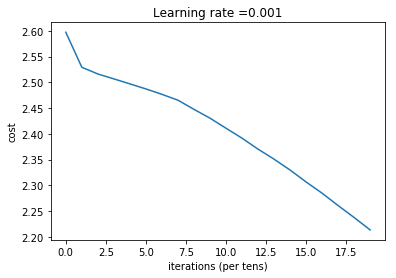

train_accuracy : 30.0000011921
test_accuracy : 9.33333337307
precision : 9.33333333333
recall : 9.33333333333
f1score : 9.33333333333
Done training!



In [4]:
# Example of using dnn.train_with_hyperparameter_bundle
nn = DNN(hyperparams)
model = nn.split_data_and_train(df, label, split_percent=0.7)
# parameters = model[dnn.KEY_PARAMETERS]